# Creating a Neural Network


## Imports

In [5]:
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

## Dataset

This dataset includes 60,000 images for training and 10,000 images for validation/testing.

In [6]:
fashion_mnist = keras.datasets.fashion_mnist  # load dataset

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()  # split into tetsing and training

4423680/4422102 [==============================] - 3s 1us/step


Let's have a look at this data to see what we are working with.

In [7]:
train_images.shape

(60000, 28, 28)

So we've got 60,000 images that are made up of 28x28 pixels (784 in total).

In [8]:
train_images[0,23,23]  # let's have a look at one pixel

194

Our labels are integers ranging from 0 - 9. Each integer represents a specific article of clothing. We'll create an array of label names to indicate which is which.

In [9]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Fianlly let's look at what some of these images look like!

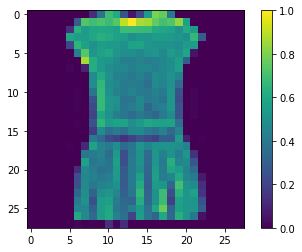

In [22]:
plt.figure()
plt.imshow(train_images[3])
plt.colorbar()
plt.grid(False)
plt.show()

## Data Preprocessing


In [11]:
train_images = train_images / 255.0

test_images = test_images / 255.0

## Building the Model


In [12]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer (1)
    keras.layers.Dense(128, activation='relu'),  # hidden layer (2)
    keras.layers.Dense(10, activation='softmax') # output layer (3)
])

## Compile the Model


In [13]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Training the Model


In [14]:
model.fit(train_images, train_labels, epochs=10)  # we pass the data, labels and epochs and watch the magic!

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 13s 220us/sample - loss: 0.4943 - accuracy: 0.8260
Epoch 2/10
60000/60000 [==============================] - 12s 193us/sample - loss: 0.3704 - accuracy: 0.8659- loss: 0.3710 - accuracy: 
Epoch 3/10
60000/60000 [==============================] - 12s 203us/sample - loss: 0.3365 - accuracy: 0.8773- loss: 0.3374 - accuracy: 0. - E
Epoch 4/10
60000/60000 [==============================] - 14s 236us/sample - loss: 0.3135 - accuracy: 0.8843- loss: 0.3140 - ac
Epoch 5/10
60000/60000 [==============================] - 14s 225us/sample - loss: 0.2932 - accuracy: 0.8919
Epoch 6/10
60000/60000 [==============================] - 11s 188us/sample - loss: 0.2792 - accuracy: 0.8973
Epoch 7/10
60000/60000 [==============================] - 9s 152us/sample - loss: 0.2668 - accuracy: 0.9004
Epoch 8/10
60000/60000 [==============================] - 10s 159us/sample - loss: 0.2551 - accuracy: 0.9043
Epoch 9/10
60000/60000 [===

## Evaluating the Model


In [15]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1) 

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 2s 150us/sample - loss: 0.3240 - accuracy: 0.8837
Test accuracy: 0.8837


You'll likely notice that the accuracy here is lower than when training the model. This difference is reffered to as **overfitting**.

And now we have a trained model that's ready to use to predict some values!

## Making Predictions


In [16]:
predictions = model.predict(test_images)
print(predictions)

[[1.41136496e-07 1.75851875e-10 4.77339036e-11 ... 9.32499208e-03
  7.11612103e-08 9.90634084e-01]
 [1.83900738e-06 8.24860471e-14 9.98960495e-01 ... 2.39508475e-17
  2.06563204e-11 2.79895134e-15]
 [1.28082378e-09 1.00000000e+00 2.78936162e-12 ... 1.87862424e-19
  1.21346292e-13 1.05741535e-19]
 ...
 [6.74139665e-06 1.56853176e-11 2.06881600e-06 ... 1.27707480e-08
  9.99847293e-01 1.22185548e-16]
 [9.18076211e-08 9.99995589e-01 2.36985969e-08 ... 2.06697893e-14
  5.71521408e-09 1.47447974e-11]
 [1.59320243e-05 3.38402657e-07 3.32082755e-06 ... 3.63915716e-03
  3.05180991e-04 2.95444515e-05]]
